<a href="https://colab.research.google.com/github/disha2sinha/Sentimental-Analysis-Movie-Reviews/blob/master/Movie_Sentimental_Analysis(Word_Cloud_And_Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=82e32a43d4416561518d857660cb3052983835188e58a864e8ea4aeba4865490
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 154.5 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [0]:
!kill -9 -1

**Import Movie Dataset**

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 44.5MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link="https://drive.google.com/open?id=1PU97Jmwme5on1FpjD65z3nZHWX37amiD"

In [0]:
fluff,id=link.split('=')

In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dataset.csv')  
df = pd.read_csv('dataset.csv',engine='python')
df

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1
6,"Shakespeare fan, appreciate Ken Branagh done b...",0
7,privilege watching Scarface big screen beautif...,1
8,real classic. shipload sailors trying get town...,1
9,Serials short subjects originally shown theate...,1


**Dataset Information and Description**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
SentimentText    25000 non-null object
Sentiment        25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


**Number of Positive And Negative Reviews**

In [0]:
print("Number of Positive And Negative Reviews:\n",df.Sentiment.value_counts())

Number of Positive And Negative Reviews:
 1    12500
0    12500
Name: Sentiment, dtype: int64


**Finding Longest And Shortest Review**

In [0]:
rev_len = df.SentimentText.str.len()
print("Longest Review:",max(rev_len))
print("Shortest Review:",min(rev_len))

Longest Review: 9836
Shortest Review: 7


 **Spliting Positive and Negative reviews According to Polarity of the Sentiments**

In [0]:
from textblob import TextBlob

In [0]:
positive_review=""
negative_review=""

for review in df.SentimentText:
  blob_rev=TextBlob(review)
  if (blob_rev.sentiment.polarity>0.50):
    positive_review=positive_review+review
  else:
    negative_review=negative_review+review

**Creating Word Clouds Of Positive Reviews**

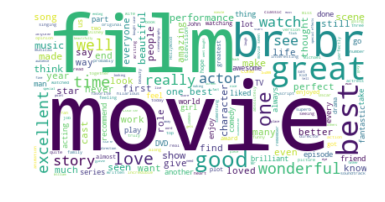

In [0]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
my_cloud = WordCloud(background_color='white').generate(positive_review)


plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")


plt.show()

**Creating Word Clouds Of Negative Reviews**

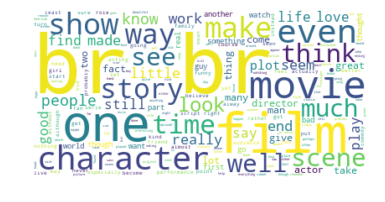

In [0]:
my_cloud = WordCloud(background_color='white').generate(negative_review)


plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")


plt.show()

**Removing STOPWORDS**

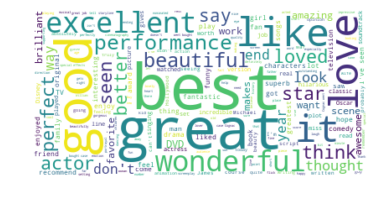

In [0]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
my_stop_words = ENGLISH_STOP_WORDS.union(['show','times','story', 'actor','movie','movies','people','character','world','episode','watching','director','John','films','life','role','br','know','another','plots','character','make','see','watch','film','series','give','time','really','acting','music','cast','it','scene','song'])
my_cloud = WordCloud(background_color='white',stopwords=my_stop_words).generate(positive_review)


plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")


plt.show()

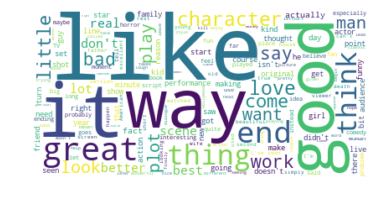

In [0]:
my_cloud = WordCloud(background_color='white',stopwords=my_stop_words).generate(negative_review)


plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")


plt.show()

**Tokenizing SentimentText**

In [0]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
rev_tokens=[word_tokenize(review)for review in df.SentimentText]
token_len=[]
for i in range(len(rev_tokens)):
     token_len.append(len(rev_tokens[i]))
df['len_text'] = token_len
df

,SentimentText,Sentiment,len_text
0,"first think another Disney movie, might good, ...",1,68
1,"Put aside Dr. House repeat missed, Desperate H...",0,137
2,"big fan Stephen King's work, film made even gr...",1,248
3,watched horrid thing TV. Needless say one movi...,0,103
4,truly enjoyed film. acting terrific plot. Jeff...,1,87
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,52
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,50
7,privilege watching Scarface big screen beautif...,1,415
8,real classic. shipload sailors trying get town...,1,31
9,Serials short subjects originally shown theate...,1,185
